In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

In [131]:
def Numerov(g,  p_ini, x, dx=0.1):
    y = zeros(len(x))
    y[0] = p_ini[0]
    y[1] = p_ini[1]
    
    f = ones(len(x)) + (dx*dx/12.0)*g
    for i in range(2, len(x)):
        y[i] = ((12.0-10.0*f[i-1])*y[i-1]-f[i-2]*y[i-2])/f[i]

    return y

def g_func(potencial, E, x, args):
    return 2.0*(E*ones(len(x)) - potencial(x, args))

def NumerovEnergyShooting_caja(potencial, args, p_ini, x_def, E_def, dx=0.01, dE = 0.1, epsilon=1.0e-4):
    x = arange(x_def[0], x_def[1]+dx, dx)
    e = E_def[0]
    y = Numerov(g_func(potencial, e, x, args),  p_ini, x, dx)
    
    sign = y[-1]
    sign_temp = sign
    
    paso = False
    c=0
    while (abs(y[-1])>epsilon):
        c=c+1
        if sign_temp*sign < 0 or paso:
            if paso == False:
                E = [e-dE, e]
                paso = True
            else:
                if y[-1] < 0:
                    if y[-1]-y[-2]<0:
                        E = [E[0], e]
                    else:
                        E = [e, E[1]]
                else:
                    if y[-1]-y[-2]<0:
                        E = [e, E[1]]
                    else:
                        E = [E[0], e]

            e = 0.5*(E[0]+E[1])
            y = Numerov(g_func(potencial, e, x, args),  p_ini, x, dx)
        else:
            sign_temp = sign.copy()
            e = e + dE
            y = Numerov(g_func(potencial, e, x, args),  p_ini, x, dx)        
            sign = y[-1]

        norm = 0.0
        for i in range(len(x)):
            norm += y[i]*y[i]
        norm = norm*dx
        y = y/sqrt(norm)
        if c==1e3:
            break
    return e, x, y

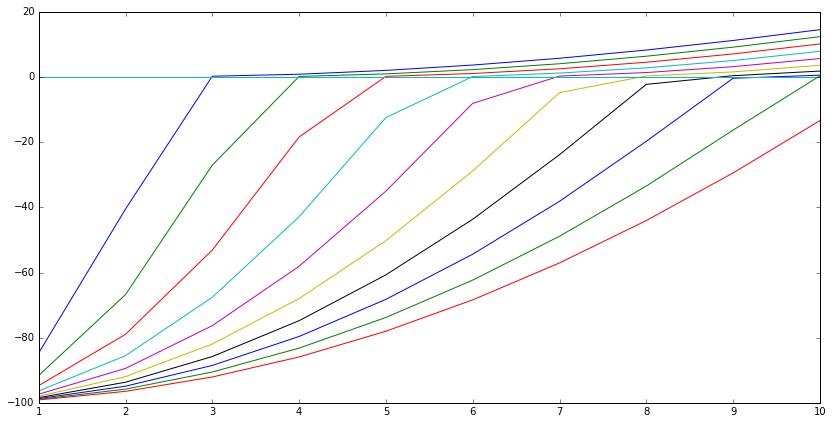

In [146]:
def pot1(x, a):
    pot = zeros_like(x)
    for i in range(len(x)):
        if abs(x[i]) < a:
            pot[i] = -100
        else:
            pot[i] = 0
    return pot

fig = figure(figsize=(14,7))
ax = fig.add_subplot(111)


x_max = 5.0
dx = 0.01
dE = 0.1
a = 0.5
da = 0.2

N = 10
M = 10
energies = zeros((N, M))

for j in range(M):
    a_temp = a+da*j
    e = -100.0
    for i in range(N):
        e_temp = e
        e, x, y = NumerovEnergyShooting_caja(pot1, [a_temp], array([0.0, 1.0]), array([-x_max, 0]), 
                                        array([e_temp+dE, 100.0]), dx, dE, 1.0e-4)
        energies[i, j] = e

    ax.plot(range(1,N+1), energies[:,j])
    
ax.plot(range(1,N+1), zeros(N))